# SVD

In [15]:
from PIL import Image
from skimage import io
import time
import os
import glob
import xlsxwriter
import math

# plt.style.use('classic')
total_time = 0.0
start_total = time.process_time()

i = 0
os.mkdir('svd-output-40-comps')
path="resized-output/*.jpeg*"

for image in glob.glob(path):
    img = Image.open(image)
    # convert to numpy array
    imgmat = np.array(list(img.getdata(band=0)), float)
    # Reshape according to orginal image dimensions
    imgmat.shape = (img.size[1], img.size[0])

#     plt.figure(figsize=(9, 6))
#     plt.imshow(imgmat, cmap='gray')
#     plt.show()
    U, D, V = np.linalg.svd(imgmat)
    imgmat.shape
    U.shape
    D.shape
    V.shape
    reconstimg = np.matrix(U[:, :40]) * np.diag(D[:40]) * np.matrix(V[:40, :])
    reconstimg = reconstimg.astype(np.uint8)
    io.imsave("svd-output-40-comps/image%05i.jpeg" %i, reconstimg)
#     plt.imshow(reconstimg, cmap='gray')
#     plt.show()
    i += 1
    
total_time += time.process_time() - start_total
print("Total Time required for execution: ", total_time)


Total Time required for execution:  94.28125


In [16]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [18]:
workbook = xlsxwriter.Workbook('SVD-Dimensionality-reduction-analysis.xlsx')
worksheet = workbook.add_worksheet()

# SVD columns
worksheet.write('A1', 'log(MSE-SVD-40-components)')
worksheet.write('B1', 'log(MSE-SVD-45-components)')
worksheet.write('C1', 'log(MSE-SVD-50-components)')
worksheet.write('D1', 'log(MSE-SVD-55-components)')
worksheet.write('E1', 'log(MSE-SVD-60-components)')

path_resized = "D:/Documents/final-year-project/resized-output/*.jpeg*"

# Path variable for SVD
path_svd_40_comps = "D:/Documents/final-year-project/svd-output-40-comps/*.jpeg*"
path_svd_45_comps = "D:/Documents/final-year-project/svd-output-45-comps/*.jpeg*"
path_svd_50_comps = "D:/Documents/final-year-project/svd-output-50-comps/*.jpeg*"
path_svd_55_comps = "D:/Documents/final-year-project/svd-output-55-comps/*.jpeg*"
path_svd_60_comps = "D:/Documents/final-year-project/svd-output-60-comps/*.jpeg*"

rowIndexSVD = 2
for imgResized, imgSVD40Comps, imgSVD45Comps, imgSVD50Comps, imgSVD55Comps, imgSVD60Comps in zip(glob.glob(path_resized), glob.glob(path_svd_40_comps), glob.glob(path_svd_45_comps), glob.glob(path_svd_50_comps), glob.glob(path_svd_55_comps), glob.glob(path_svd_60_comps)):
    img_resized = io.imread(imgResized)
    img_svd_40_comps = io.imread(imgSVD40Comps)
    img_svd_45_comps = io.imread(imgSVD45Comps)
    img_svd_50_comps = io.imread(imgSVD50Comps)
    img_svd_55_comps = io.imread(imgSVD55Comps)
    img_svd_60_comps = io.imread(imgSVD60Comps)
    
    err_svd_40_comps = mse(img_resized, img_svd_40_comps)
    err_svd_45_comps = mse(img_resized, img_svd_45_comps)
    err_svd_50_comps = mse(img_resized, img_svd_50_comps)
    err_svd_55_comps = mse(img_resized, img_svd_55_comps)
    err_svd_60_comps = mse(img_resized, img_svd_60_comps)
    
    # Calculating log for better visualization
    log_mse_svd_40_comps = math.log(err_svd_40_comps)
    log_mse_svd_45_comps = math.log(err_svd_45_comps)
    log_mse_svd_50_comps = math.log(err_svd_50_comps)
    log_mse_svd_55_comps = math.log(err_svd_55_comps)
    log_mse_svd_60_comps = math.log(err_svd_60_comps)
    
    worksheet.write('A' + str(rowIndexSVD), log_mse_svd_40_comps)
    worksheet.write('B' + str(rowIndexSVD), log_mse_svd_45_comps)
    worksheet.write('C' + str(rowIndexSVD), log_mse_svd_50_comps)
    worksheet.write('D' + str(rowIndexSVD), log_mse_svd_55_comps)
    worksheet.write('E' + str(rowIndexSVD), log_mse_svd_60_comps)    
   
    rowIndexSVD += 1

workbook.close()

print("SVD MSE Calculation Successful!")

SVD MSE Calculation Successful!


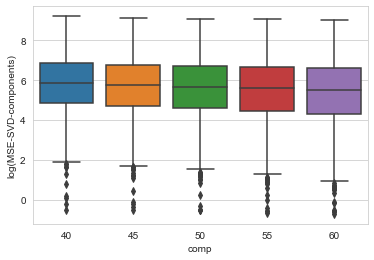

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the dataset
Boxplot= pd.read_csv("D:/Documents/final-year-project/ANALYSIS OF DR/svd-mse-analysis.csv")

sns.set_style("whitegrid")

boxplot_svd = sns.boxplot(x = 'comp', y = 'log(MSE-SVD-components)', data = Boxplot)
plt.savefig('D:/Documents/final-year-project/ANALYSIS OF DR/SVD_DR_analysis_boxplot.png', orientation = 'horizontal')